In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using HDF5
using KernelDensity
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT
using DSP

In [28]:
FPATH = "../../data/sampling_results/Benchmark-5/"

function marg_mean(name)
    smpl_tmp = bat_read(FPATH*name)
    smpl_tmp = varshape(prior).(smpl_tmp)
    smpl_tmp = unshaped(mean(smpl_tmp))
    return smpl_tmp
end

function marg_std(name)
    smpl_tmp = bat_read(FPATH*name)
    smpl_tmp = varshape(prior).(smpl_tmp)
    smpl_tmp = unshaped(std(smpl_tmp))
    return smpl_tmp
end

function cov_matr(name)
    smpl_tmp = bat_read(FPATH*name)
    smp_fl, w = flatview(unshaped.(smpl_tmp.v)), smpl_tmp.weight
    smp_fl = smp_fl ./ std(smp_fl, FrequencyWeights(w), 2)
    smp_fl = smp_fl .- mean(smp_fl, FrequencyWeights(w), dims=2)
    cov_m = cov(smp_fl, FrequencyWeights(w), 2)
    return cov_m
end

cov_matr (generic function with 1 method)

In [32]:
β1 = 0.015
β2 = 0.0077 # (0.8/30/sqrt(12))
β3 = 0.0058 # (0.8/40/sqrt(12))

# flat prior for the pixel size
prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.06, 0.19), truncated(Normal(0.2, 0.04), 0.06, 0.19)],
        tr_size_2 = [truncated(Normal(0.2, 0.04), 0.06, 0.19), truncated(Normal(0.2, 0.04), 0.06, 0.19)],
        ang_spr = [truncated(Normal(4.0, 2.0), 4.0, 7.0), truncated(Normal(4.0, 2.0), 4.0, 7.0)],
        ang_spr_2 = [truncated(Normal(4.0, 2.0), 1.0, 4.0), truncated(Normal(4.0, 2.0), 1.0, 4.0)],
        mixt_pow =  0.50 .. 1.0 ,
        waist = [truncated(Normal(2.9, 0.03), 2.65, 3.5)],
        waist_2 = [truncated(Normal(2.9, 0.03), 2.65, 3.5)], # 11
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [1, 1, 1], # 23, 24, 25, 
        resy = [1, 1, 1], # 26,27, 28, 
        cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
        cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
        psx = [27.1, 21.6, 114.0], # 31, 32, 33
        psy = [30.5, 23.4, 125.0], # 34, 35, 36
        cam4_psx = 121.8, # 37
        cam4_psy = 120.0, # 38
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    )


labels = [L"\sigma_x", L"\sigma_y", L"\sigma_x", L"\sigma_y", L"\sigma'_x", L"\sigma'_y", L"\sigma'_x", L"\sigma'_y", L"\alpha", L"s", L"s", 
    L"\mu_x", L"\mu_x", L"\mu_x", L"\mu_x", L"\mu_y", L"\mu_y", L"\mu_y", L"\mu_y", 
    "ped", "lf", "a", "res x", "res y", "la", "la", "la"];

In [4]:
smpl_tmp = bat_read(FPATH*"hc-2.hdf5")
smpl_tmp = varshape(prior).(smpl_tmp)
@show mode(smpl_tmp)[1]

(mode(smpl_tmp))[1] = (tr_size = [0.09022016247626924, 0.13278027377370621], tr_size_2 = [0.13087542193714233, 0.15158061149510935], ang_spr = [6.227488514589307, 5.755259786375036], ang_spr_2 = [2.6057915179686617, 2.397589287133589], mixt_pow = 0.666006673110822, waist = [3.1425423563421417], waist_2 = [2.8738232953734717], algmx = [31.741703234746318, 32.22277650028469, 21.291812547178893, 35.2540699308112], algmy = [36.930260443041675, 37.40757355716955, 20.25845816811686, 33.90824607487838], cam4_ped = 27.57169693775633, cam4_light_fluct = 1.365633716171961, cam4_light_amp = 8.846914204881422, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 4.827560766404559, cam4_resy = 4.7854307298949275, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.532172007081927, 11.430580961050259, 2.6946677414758087], s_cam = [0.0, 1.478, 15.026, 23.115])


(tr_size = [0.09022016247626924, 0.13278027377370621], tr_size_2 = [0.13087542193714233, 0.15158061149510935], ang_spr = [6.227488514589307, 5.755259786375036], ang_spr_2 = [2.6057915179686617, 2.397589287133589], mixt_pow = 0.666006673110822, waist = [3.1425423563421417], waist_2 = [2.8738232953734717], algmx = [31.741703234746318, 32.22277650028469, 21.291812547178893, 35.2540699308112], algmy = [36.930260443041675, 37.40757355716955, 20.25845816811686, 33.90824607487838], cam4_ped = 27.57169693775633, cam4_light_fluct = 1.365633716171961, cam4_light_amp = 8.846914204881422, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 4.827560766404559, cam4_resy = 4.7854307298949275, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.532172007081927, 11.430580961050259, 2.6946677414758087], s_cam = [0.0, 1.478, 15.026, 23.115])

In [5]:
filenames = readdir("../../data/sampling_results/Benchmark-5/")
images = load("../../data/experiment/dataset_2/m2/images-satur.jld2")
hc_mask = [i[1:3] == "hc-" for i in filenames]
hc_fnames = filenames[hc_mask]
hc_eind = parse.(Int64, [i[4:end-5] for i in hc_fnames])
hc_charge = images["charge"][hc_eind]
hc_runind = images["ev_ind"][hc_eind];

In [6]:
filenames = readdir("../../data/sampling_results/Benchmark-5/")
images = load("../../data/experiment/dataset_2/m1/images-satur.jld2")
lc_mask = [i[1:3] == "lc-" for i in filenames]
lc_fnames = filenames[lc_mask]
lc_eind = parse.(Int64, [i[4:end-5] for i in lc_fnames])
lc_charge = images["charge"][lc_eind]
lc_runind = images["ev_ind"][lc_eind];

In [7]:
fnames = [lc_fnames; hc_fnames]
charges = [lc_charge; hc_charge]
runind = [lc_runind ; hc_runind]
charges_n = charges ./ maximum(charges)
runind_n = runind ./ maximum(runind);

In [8]:
msklc = 1:length(lc_fnames)
mskhc = length(lc_fnames)+1:length(lc_fnames)+length(hc_fnames);

In [9]:
charges_n[sortperm(charges_n)] .= 1:length(charges_n)
charges_n = charges_n ./ maximum(charges_n);

## Plot 1: 

In [33]:
samples_name = fnames[20]
event_number = 311

@show samples_name, event_number

(samples_name, event_number) = ("lc-23.hdf5", 311)


("lc-23.hdf5", 311)

In [34]:
cv_tmp = cov_matr(samples_name);

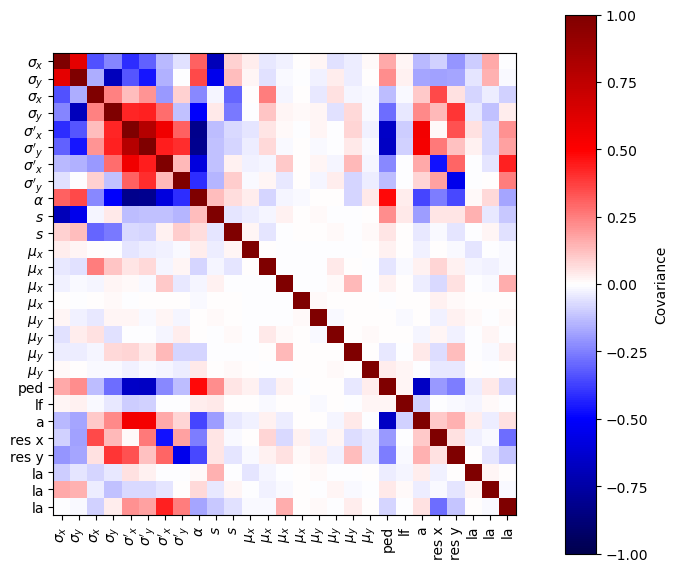

In [51]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(7,7), gridspec_kw=Dict("width_ratios"=>[15,1]))

max = maximum(abs.(cv_tmp))

cb = ax.imshow(cv_tmp,  origin="upper", cmap="seismic", vmin=-max, vmax=max, aspect="equal") 
fig.colorbar(cb, spacing="proportional", label="Covariance", cax=ax2)

ax.set_yticks(0:26)
ax.set_yticklabels(labels)

ax.set_xticks(0:26)
ax.set_xticklabels(labels, rotation = 90);

## Plot 3: 

In [75]:
mean_params =  [marg_mean(i) for i in fnames[mskhc]]
mean_matr = hcat(mean_params...);

In [76]:
mean_matr = mean_matr ./ std(mean_matr, dims=2)
cv = mean_matr .- mean(mean_matr, dims=2)
cv = cov(cv');

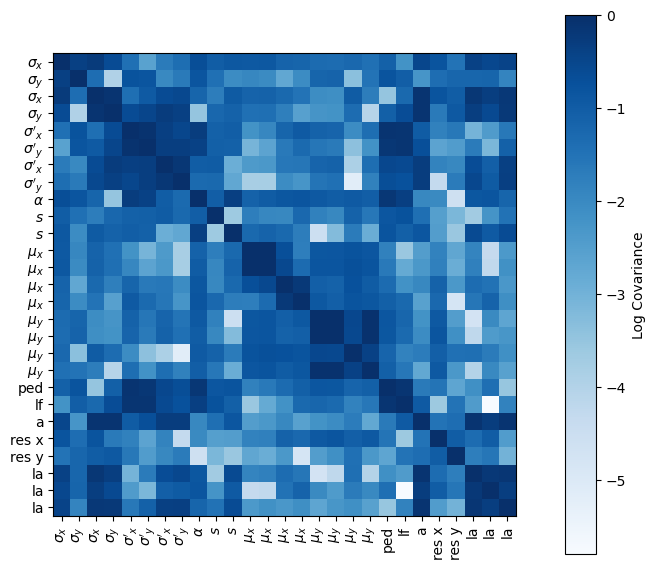

In [84]:
fig, (ax, ax2) = plt.subplots(1,2, figsize=(7,7), gridspec_kw=Dict("width_ratios"=>[15,1]))

max = maximum(abs.(cv))

# cb = ax.imshow(cv,  origin="upper", cmap="seismic", vmin=-max, vmax=max, aspect="equal") 
cb = ax.imshow(log.(abs.(cv)),  origin="upper", cmap="Blues", aspect="equal") 
fig.colorbar(cb, spacing="proportional", label="Log Covariance", cax=ax2)

ax.set_yticks(0:26)
ax.set_yticklabels(labels)

ax.set_xticks(0:26)
ax.set_xticklabels(labels, rotation = 90);